# Time Series TSIA202a - Practical works

In [147]:
import numpy as np
%matplotlib ipympl
import matplotlib.pyplot as plt
import math
from scipy import signal as sig
from scipy import linalg as la


import pylab

# Exercise 1: Computing Averages and Covariances

## 1. White noise

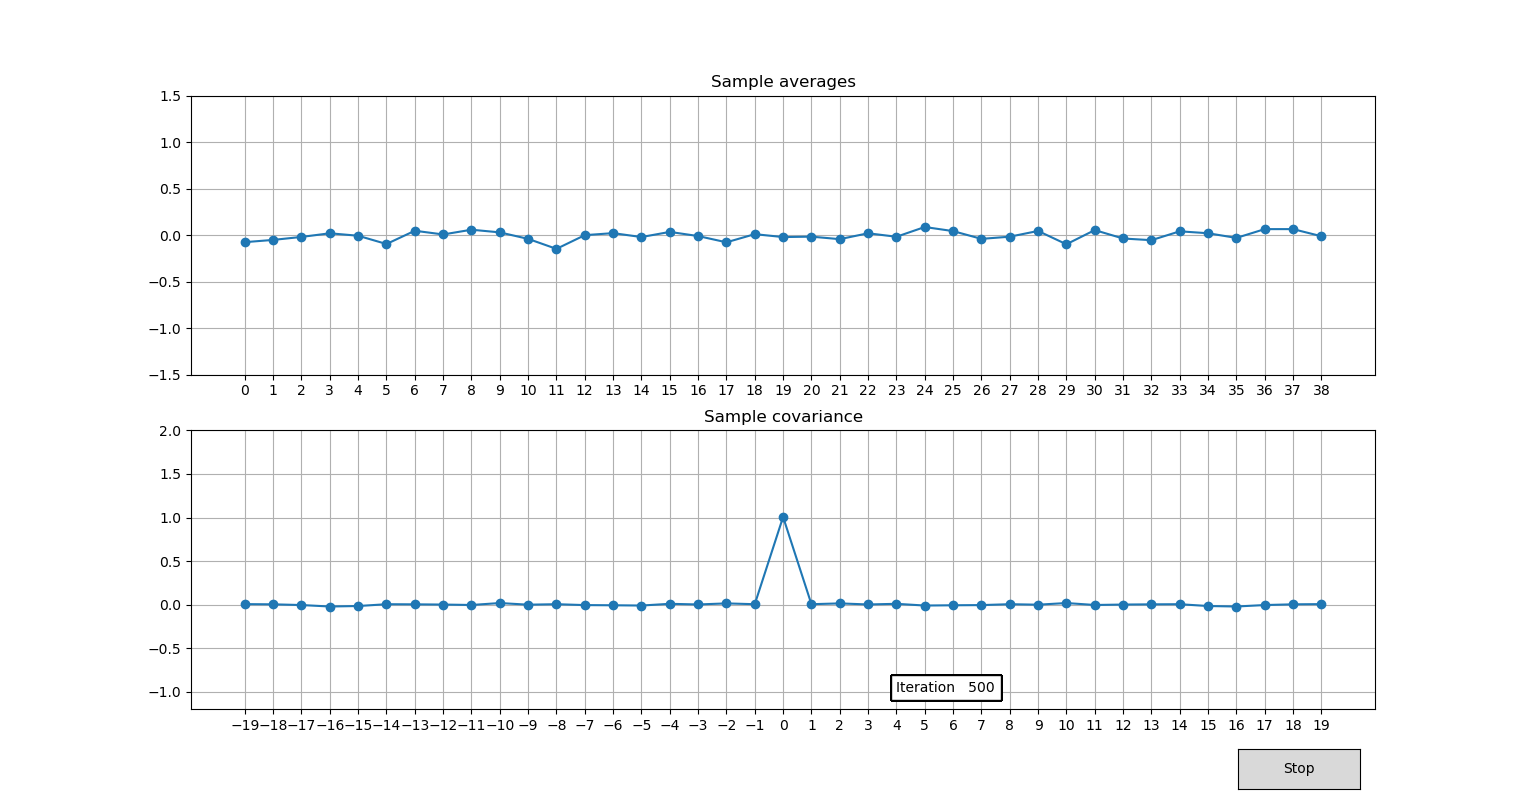

mean=0, sigma=1

## 2. AR(1)

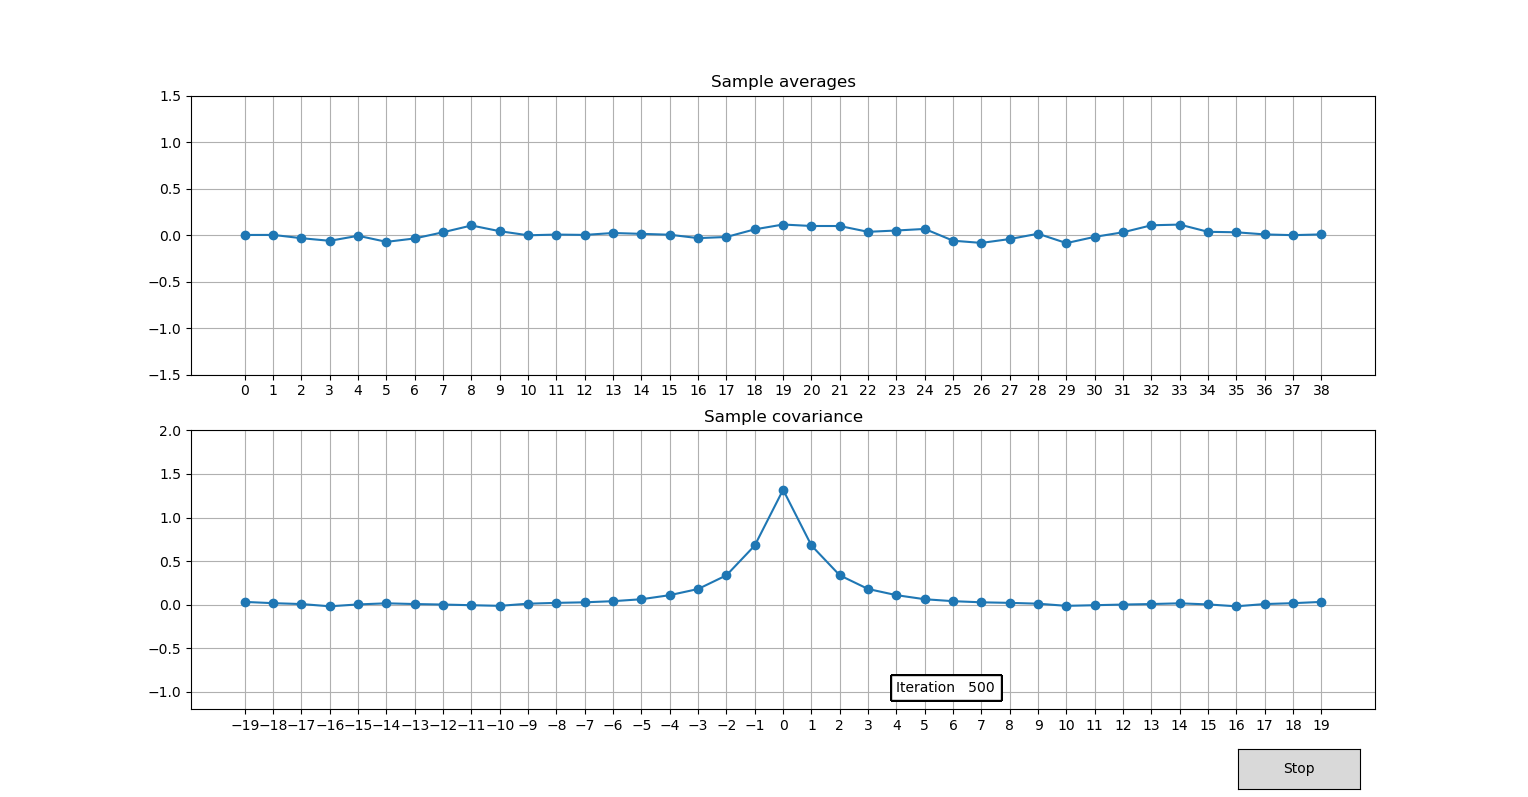

phi = 0.5

## 3. Sinusoidal process

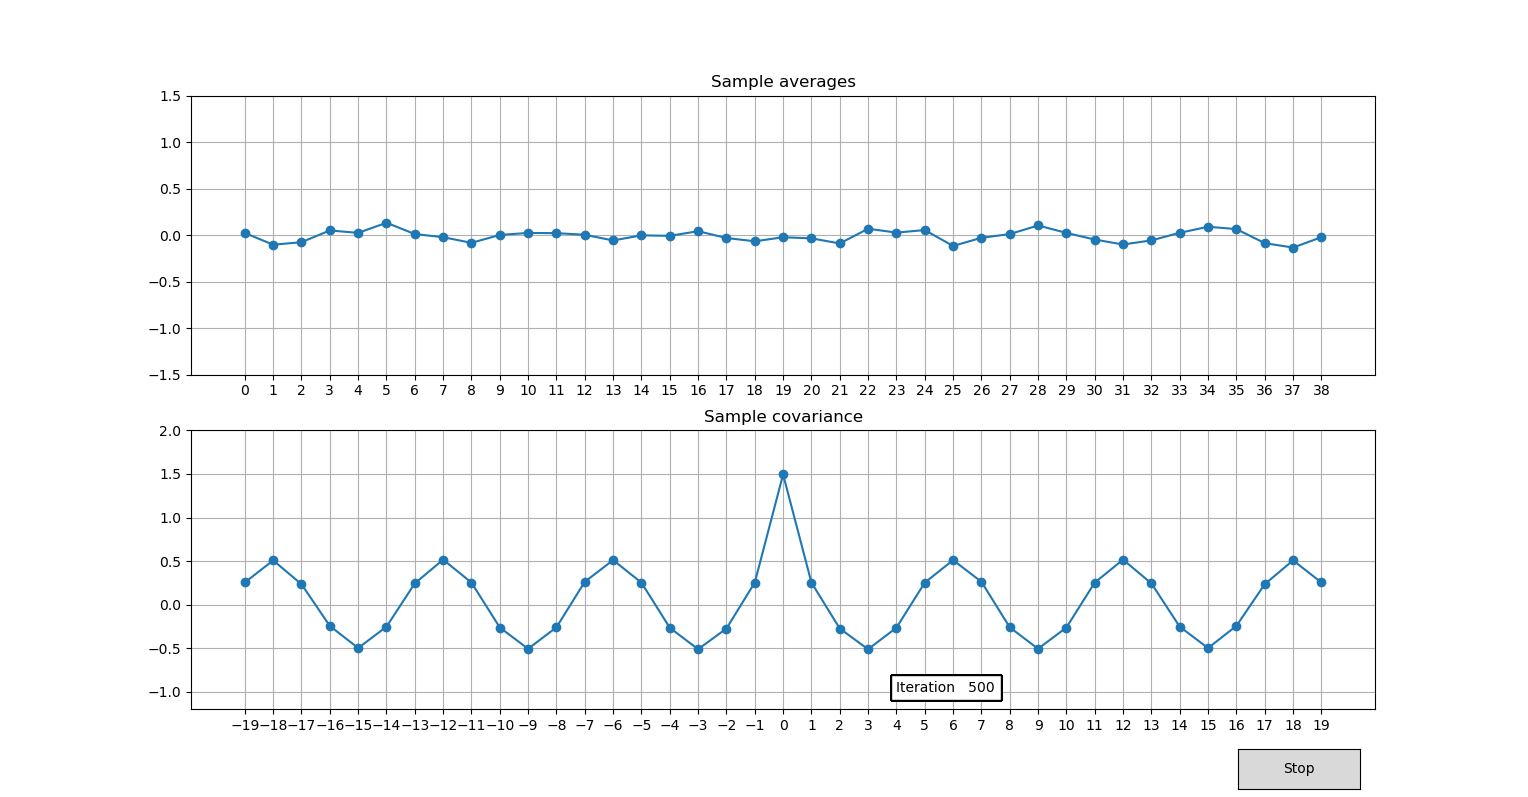

A0 = 1, lambda0=pi/3

##  Comparation with theorical models

## 1. For the white noise $Z_t$ the theorical expresion for the ACF is $\gamma (n) = \sigma^2\delta(n)$

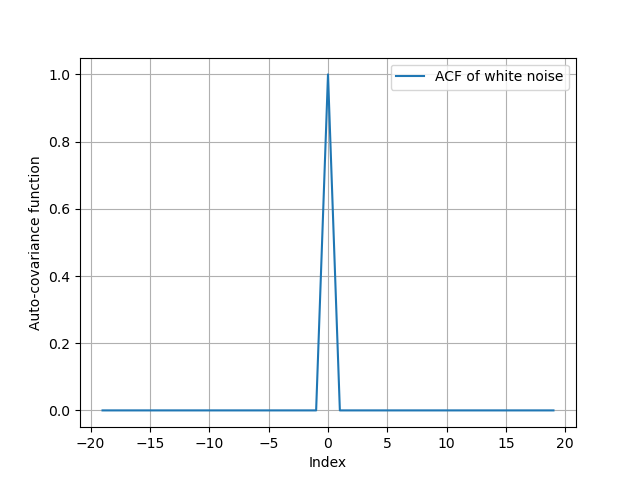

In [2]:
N=39
sigma=1
index = np.linspace(-19,19,N)
wn_acf = np.zeros(N)
wn_acf[19] = sigma**2


# Plot figure
fig, ax = plt.subplots()
ax.plot(index,wn_acf, label="ACF of white noise")
ax.legend(loc="upper right")
plt.xlabel("Index")
plt.ylabel("Auto-covariance function")
plt.grid()
plt.show()

## 2. For a causal AR(1) the theorical expresion for the ACF is $\gamma (n) = \phi^{|h|}.\frac{\sigma^2}{1-\phi^2}$

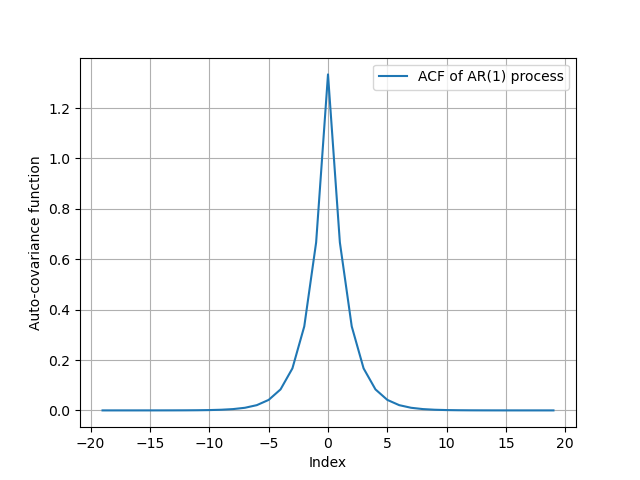

In [3]:
N=39
sigma=1
phi=0.5
index = np.linspace(-19,19,N)
ar_acf = np.zeros(N)
ar_0 = sigma**2/(1-phi**2)
for i in range(N):
    ar_acf[i]= phi**np.abs(index[i]) * ar_0
ar_acf[19] =ar_0


# Plot figure
fig, ax = plt.subplots()
ax.plot(index,ar_acf, label="ACF of AR(1) process")
ax.legend(loc="upper right")
plt.xlabel("Index")
plt.ylabel("Auto-covariance function")
plt.grid()
plt.show()


## 3. For a sinusoidal process the theorical expresion for the ACF is $\gamma (n) = \frac{A_0^2}{2}.cos(\lambda_0.n) + \sigma^2.\delta(n)$

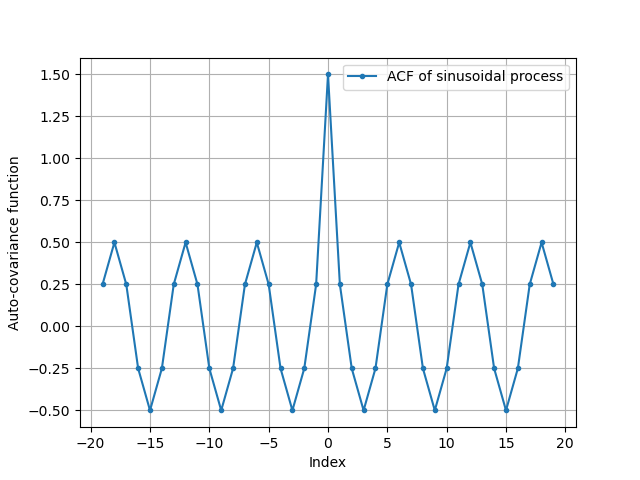

In [4]:
N=39
sigma=1
A0 = 1
lambda0 = np.pi/3
index = np.linspace(-19,19,N)
sin_acf = np.zeros(N)
sin_0 = sigma**2
for i in range(N):
    sin_acf[i]= A0**2/2 * np.cos(lambda0*index[i])
sin_acf[19] = sin_acf[19] + sin_0


# Plot figure
fig, ax = plt.subplots()
ax.plot(index,sin_acf, label="ACF of sinusoidal process",marker='.')
ax.legend(loc="upper right")
plt.xlabel("Index")
plt.ylabel("Auto-covariance function")
plt.grid()
plt.show()

The empirical autocovariances match with the theoretical calculations.

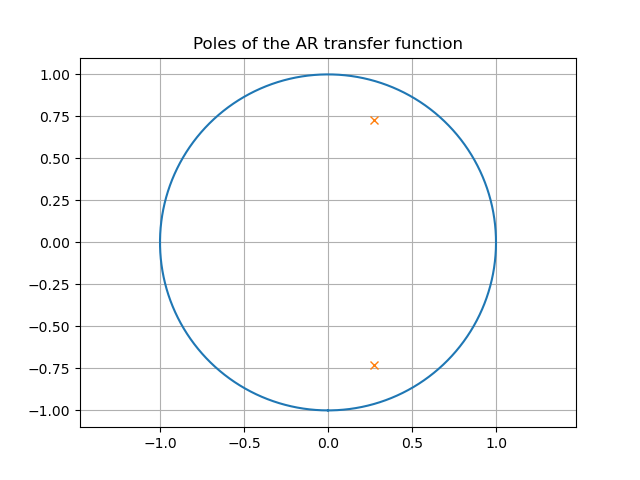

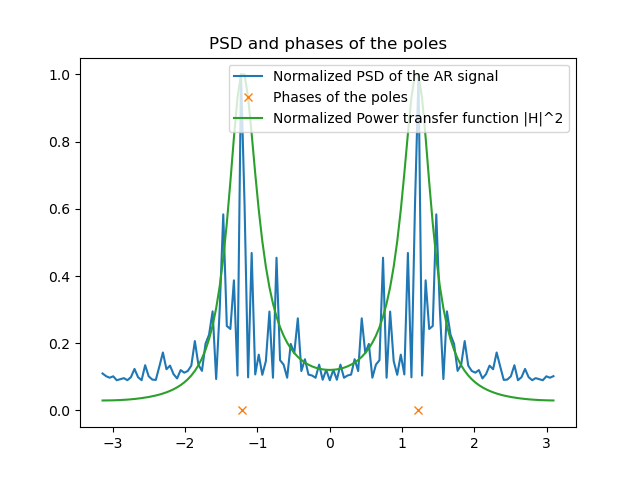

# Exercise 2: Spectral density estimation and periodogram

## 1.


$I_n(\lambda) = \frac{1}{2\pi} \sum_{h=-n+1}^{n-1} \hat\gamma_n(h) e^{-i \lambda h}$


$= \dfrac{1}{2\pi} \sum_{h=-n+1}^{n-1} \dfrac{1}{n} \sum_{t=0}^{n-1-h} (X_t - \hat{\mu}_n)(X_{t+h} - \hat{\mu}_n) e^{-i \lambda h}$

Thanks to $\forall h<0, \hat\gamma_n(h) = \hat\gamma_n(|h|)$ we can separate the sum in:

$= \frac{1}{2\pi n} ( \sum_{h=1}^{n-1} \sum_{t=0}^{n-1-h} (X_t - \hat{\mu}_n)(X_{t+h} - \hat{\mu}_n) (e^{i \lambda h} + e^{-i \lambda h}) +  \sum_{t=0}^{n-1} (X_t - \hat{\mu}_n)^2 )$

$= \frac{1}{2\pi n} ( \sum_{t=0}^{n-2} \sum_{h=1}^{n-1-t} (X_t - \hat{\mu}_n)(X_{t+h} - \hat{\mu}_n) (e^{i \lambda h} + e^{-i \lambda h}) + \sum_{t=0}^{n-1} (X_t - \hat{\mu}_n)^2)$

If we make this change of variables $ k = t + h$ then we obtain:

$= \frac{1}{2\pi n} (\sum_{t=0}^{n-2} \sum_{k=t+1}^{n-1} (X_t - \hat{\mu}_n)(X_{k} - \hat{\mu}_n) (e^{i \lambda (k-t)} + e^{-i \lambda (k-t)}) + \sum_{t=0}^{n-1} (X_t - \hat{\mu}_n)^2 )$

$= \frac{1}{2\pi n} (\sum_{0 \leq t < k \leq n-1} (X_t - \hat{\mu}_n)(X_{k} - \hat{\mu}_n) (e^{i\lambda(k-t)} + e^{-i\lambda(k-t)}) + \sum_{t=0}^{n-1} (X_t - \hat{\mu}_n)^2 )$

$= \frac{1}{2\pi n} (\sum_{\substack{0 \leq t,k \leq n-1 \\ t \ne k}} (X_t - \hat{\mu}_n)(X_{k} - \hat{\mu}_n) e^{-i \lambda (k-t)} + \sum_{t=0}^{n-1} (X_t - \hat{\mu}_n)^2 ) $

Then:

$= \frac{1}{2\pi n} \left| \sum_{t=0}^{n-1} (X_t - \hat{\mu}_n) e^{-i \lambda t} \right|^2$

## 2. Deduce an algorithm for computing $I_n(2\pi\frac{k}{m})$

From what we know from before, we can rewrite the periodogram as:
$I_n\left(2 \pi \frac{k}{m}\right) = \sum_{h=-n+1}^{n-1} \frac{1}{2\pi} \hat{\gamma}_n(h) \, e^{-2 i \pi \frac{k}{m} h}$

In [125]:
H   = 20      # number of points for covariance
n   = 2*H -1  # number of process' samples
tc     = np.arange(-(H-1),H)  # temporal axis for ACF

## For the white noise $Z_t$

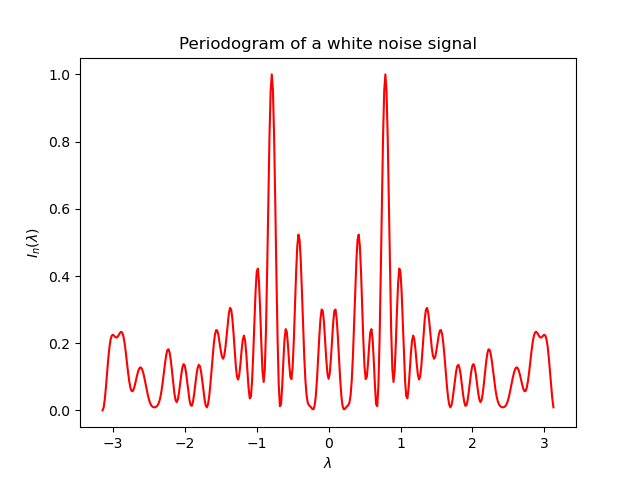

In [126]:

# Generate a white noise
X = np.random.normal(0,1,n) # White noise

# Plot the periodogram
m = 10*n
mu = np.mean(X)
Y = X - mu
I = np.abs(np.fft.fft(Y, m))**2 / (2*np.pi*n)
#for normalising
I = I / np.max(I)

fig, ax = plt.subplots()
ax.plot(np.arange(-m//2, m//2)*2*np.pi/I.size, I, c='r')
plt.title('Periodogram of a white noise signal')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$I_n(\lambda)$')
plt.show()

## For the $AR(1)$

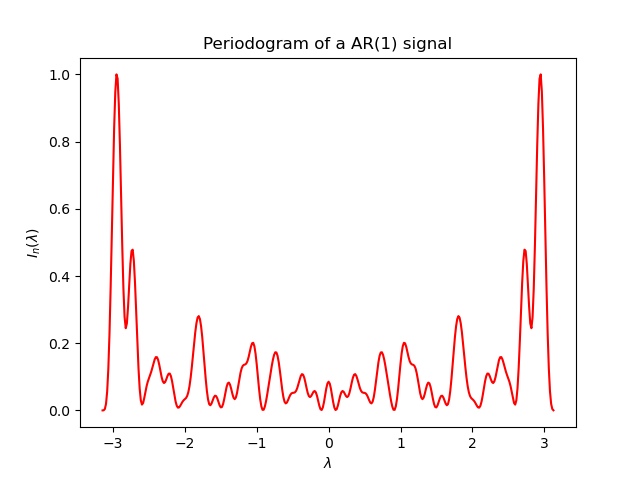

In [70]:

# Generate an AR(1) signal
Z = np.random.normal(0,1,n) # White noise
# Build the rational function P/Q
phi1  = 0.5
Pcoeffs = np.array([1.])                 
Qcoeffs = np.poly((phi1,))
# Use P/Q for filtering
X = sig.lfilter(Pcoeffs, Qcoeffs, Z)

# Plot the periodogram
m = 10*N
mu = np.mean(X)
Y = X - mu
I = np.abs(np.fft.fft(Y, m))**2 / (2*np.pi*n)
#for normalising
I = I / np.max(I)

fig, ax = plt.subplots()
ax.plot(np.arange(-m//2, m//2)*2*np.pi/I.size, I, c='r')
plt.title('Periodogram of a AR(1) signal')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$I_n(\lambda)$')
plt.show()

## For the sinusoidal process

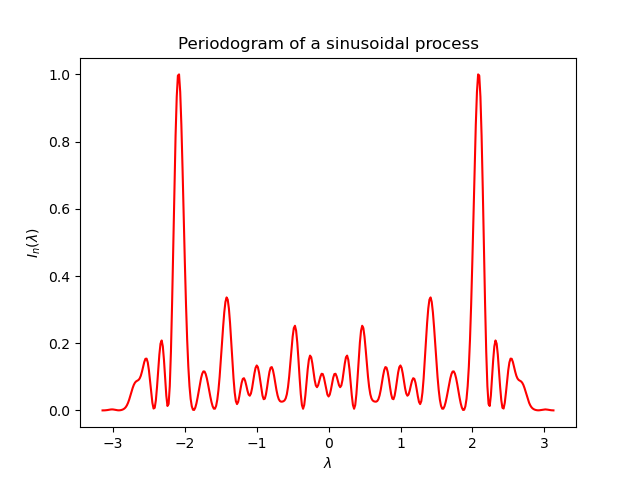

In [60]:


#Generate a sinusoidal
A_0 = 1
omega = np.pi/3
phi =  2*np.pi*np.random.random_sample(); #changed it from np.pi + 2*np.pi*np.random.random_sample()
X = A_0 * np.cos(omega*tc+phi) +  np.random.normal(0,1,n)

# Plot the periodogram
m = 10*N
mu = np.mean(X)
Y = X - mu
I = np.abs(np.fft.fft(Y, m))**2 / (2*np.pi*n)
#for normalising
I = I / np.max(I)

fig, ax = plt.subplots()
ax.plot(np.arange(-m//2, m//2)*2*np.pi/I.size, I, c='r')
plt.title('Periodogram of a sinusoidal process')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$I_n(\lambda)$')
plt.show()

## 3.

We can deduce the empirical auto-covariance estimation with the idea of the inverse DFT, choosing m= 2n-1 we have 2n-2 from the periodogram. Then:

$\forall h \in \{-n+1, \dots, n-1\},  \hat{\gamma}_n(h) = \frac{2\pi}{m} \sum_{k=-n+1}^{n-1} I_n\left(2 \pi \frac{k}{m}\right) e^{2 i \pi \frac{h}{m} k}$

In [97]:
def acovb(X=None):

    Xc = X - np.mean(X)    
    m = 2 * X.size - 1
    I = np.abs(np.fft.fft(Xc,m)) ** 2 /  X.size
    gamma = np.real(np.fft.ifft(I))    
    gamma = gamma[0:X.size]
    return gamma

The function acovb(X) correctly computes the estimate of the auto-covariance function estimation, below there is an example comparing the ACF theoretical the estimation for a white noise.

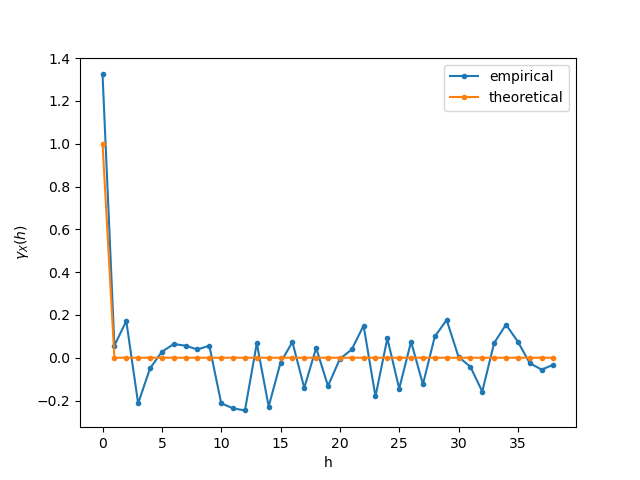

In [119]:
H   = 20     
n   = 2*H -1 

# Generate a white noise
X = np.random.normal(0,1,n) # White noise
gamma = acovb(X)

sigma=1
wn_acf = np.zeros(n)
wn_acf[0] = sigma**2

fig, ax = plt.subplots()
ax.plot(np.arange(0, n), gamma, label='empirical', marker='.')
ax.plot(np.arange(0, n), wn_acf, label='theoretical', marker='.')
plt.xlabel('h')
plt.ylabel(r'$\gamma_X(h)$')
plt.legend()
plt.show()

## 4.

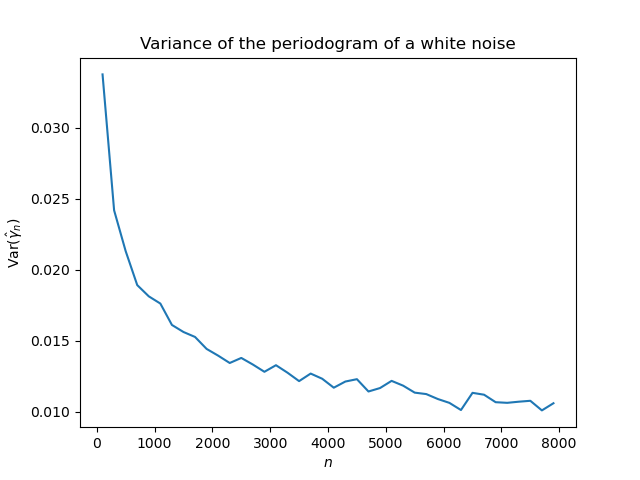

In [136]:

variance = []
for n in np.arange(100,8100,200): # calculate variance for diferent values of n
    mean_var = []
    for i in range(50):  # take the average variance of many repetitions
        X = np.random.normal(0, sigma, n)
        m = 10*n
        mu = np.mean(X)
        Y = X - mu
        I = np.abs(np.fft.fft(Y, m))**2 / (2*np.pi*n)
        #for normalising
        I = I / np.max(I)
        var = np.var(I)
        mean_var.append(var)
    variance.append(np.mean(mean_var))

fig, ax = plt.subplots()
ax.plot(np.arange(100,8100,200), variance)
#plt.xscale('log')
plt.title(r'Variance of the periodogram of a white noise')
plt.xlabel(r'$n$')
plt.ylabel(r'$\mathrm{Var}(\hat{\gamma}_n)$')
plt.show()

We can observe how the variance of the periodogram decreases when n tends to infinity. As we observe the signal over a longer period, then we can infer the periodogram with better precision.

# Exercise 3

# Part I - Yule-Walker equations

## 1.

Since X is a real, causal, zero-mean AR-(p) process, then there exists $(\alpha_k)_{k \in \mathbb{N}}$ so that $ X_t = \sum_{k=0}^{+\infty} \alpha_k Z_{t-k}$.

$\forall h \ge 1, \mathbb{E}(X_{t-h}Z_t) = \mathbb{E}\left[ \left(\sum_{k=0}^{+\infty} \alpha_k Z_{t-h-k}\right) Z_t \right] =
\mathrm{Cov}\left(\sum_{k=0}^{+\infty} \alpha_k Z_{t-h-k}, Z_t\right) =
\sum_{k=0}^{+\infty} \alpha_k \mathrm{Cov}(Z_{t-h-k}, Z_t) =
\sum_{k=0}^{+\infty} \alpha_k \delta_{h+k} = 0$

## 2.

$\forall h \geq 1 $

$\gamma(h) = \mathrm{Cov}(X_t, X_{t-h}) =
\mathrm{Cov}\left(\sum_{k=1}^p \phi_k X_{t-k} + Z_t, X_{t-h}\right) =
\sum_{k=1}^p \phi_k \mathrm{Cov}(X_{t-k}, X_{t-h}) + \mathrm{Cov}(Z_t, X_{t-h}) =
\sum_{k=1}^p \phi_k \gamma(h-k)$

## 3.

$h=0$

Using the results previously obtained, we can find $\gamma(0)$ as follows:

$\gamma(0) = \mathrm{Cov}(X_t, X_t) =
\mathrm{Cov}\left(\sum_{k=1}^p \phi_k X_{t-k} + Z_t, X_t\right) =
\sum_{k=1}^p \phi_k \mathrm{Cov}(X_{t-k}, X_t) +  \mathrm{Cov}(Z_t, X_t) =
\sum_{k=1}^p \phi_k \gamma(-k) + \mathrm{Cov}\left(Z_t, \sum_{k=0}^{+\infty} \alpha_k Z_{t-k}\right) =
\sum_{k=1}^p \phi_k \gamma(-k) + \sigma^2$



## 4.

From the cours handout we can write $\Gamma_{p+1}$:

$\Gamma_{p+1} =
\begin{bmatrix}
\gamma(0) & \gamma(-1) & \dots & \dots & \gamma(-p) \\
\gamma(1) & \gamma(0) & \ddots & \ddots & \gamma(-p+1) \\
\vdots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \gamma(-1) \\
\gamma(p) & \gamma(p-1) & \dots & \gamma(1) & \gamma(0) 
\end{bmatrix}$

# Part 2 - Estimation

In [151]:
# Define some functions from the TP script


def genAR(p,n,noiseSTD=1):
# Returns    
# X :   Generated AR process 
# phi : coefficients or recurrence equation 
#       X(t) = phi(1)X(t-1)+...+phi(p)X(t-p) + Z(t);
#       Z(t) is WN(0,1).
# p :   Order of AR filter
# n :   Number of output samples
# noiseSTD : STD of the white noise. Default = 1

    # random draw of int(p/2) complex roots inside the unit circle 
    nrc = int(p/2) #% number of complex roots

    # Set the module of the poles in the (0.5 0.999) interval
    rho = .5+0.499*np.sqrt(np.random.random_sample(nrc)) 
    theta = 2*np.pi*np.random.random_sample(nrc)
    zk = rho *np.exp(1.j *theta);
    #
    # Compute transient lenght
    zmax = zk[np.abs(zk)==np.max(np.abs(zk))]
    rhomax = np.abs(zmax)
    tau = -1./np.log(rhomax) 
    transient = int(5*tau)    #  we allow for some room
    
    zk = np.concatenate((zk, np.conjugate(zk)))
    if np.remainder(p,2): # we need to add one real positive root in the interval (0,1)
        realRoot = np.random.random_sample()
        zk =  np.concatenate(([realRoot], zk))
                                      
    coeff = np.poly(zk) # coefficients of polynomial p(z) = prod_k( z-z_k);
    coeff = np.real(coeff) # remove possible imag residuals due to limited precision
    
    
    phi = -coeff[1:];
                
    # White noise generation. Lenght = n+transient
    noise = noiseSTD*np.random.randn(n+transient)

    # AR signal generation
    X =  sig.lfilter([1], coeff, noise)
    
    # Removing the transient
    X=X[transient:]

    return X, phi

def acovb(X=None):

    Xc = X - np.mean(X)    
    m = 2 * X.size - 1
    I = np.abs(np.fft.fft(Xc,m)) ** 2 /  X.size
    gamma = np.real(np.fft.ifft(I))    
    gamma = gamma[0:X.size]
    return gamma

def drawZ_DTFT_AR(X,phi):
    # Draws the poles of the AR transfer function
    # Draws the DTFT and the positions of the poles
    coeff = np.concatenate(([1], -phi))
    zk    = np.roots(coeff)
    theta = np.angle(zk)
    
    #%%
    plt.figure()
    # Draw the unit circle
    t = np.linspace(-np.pi,np.pi,1024)
    plt.plot(np.sin(t),np.cos(t))
    plt.axis('equal')
    plt.grid()
    plt.plot(np.real(zk),np.imag(zk), 'x' )
    plt.title('Poles of the AR transfer function')
    
    #%%
    plt.figure()    
    # the smallest integer power of two that is not less than the size of X
    nPoints = int(np.exp2( np.ceil(np.log2(X.size))) )
    nu = np.linspace(-0.5, 0.5 - 1/nPoints, nPoints)
    omega = 2*np.pi*nu
    acf = acovb(X)
    PSD = np.real(np.fft.fft(acf,int(nPoints))) #
    plt.plot(omega,np.fft.fftshift(PSD)/max(PSD))
    plt.plot(theta,np.zeros_like(theta),'x')
    plt.title('PSD and phases of the poles')
       
    # Draw the filter energy transfer function |H(nu)|^2
    w, H = sig.freqz([1], coeff, omega)
    H2 = np.real( H*np.conj(H))
    plt.plot(omega,H2/max(H2))
    
    plt.legend(['Normalized PSD of the AR signal','Phases of the poles','Normalized Power transfer function |H|^2'])


[1.         1.5467029  1.69407944 1.25132604 0.72567403]
[1.         1.54971273 1.68071212 1.22996155 0.7230985 ]
Relative error 0.89% 


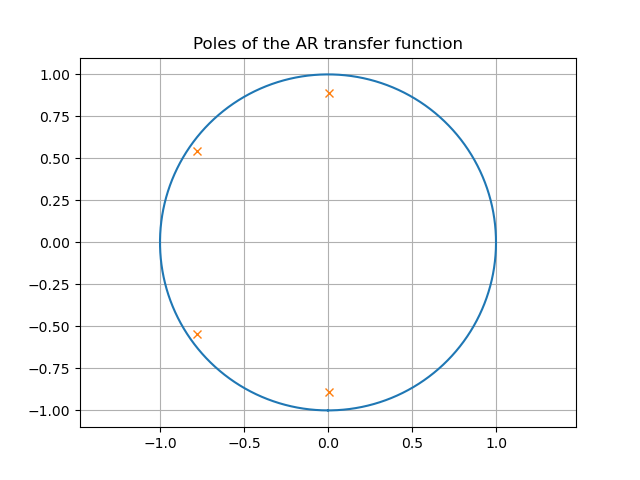

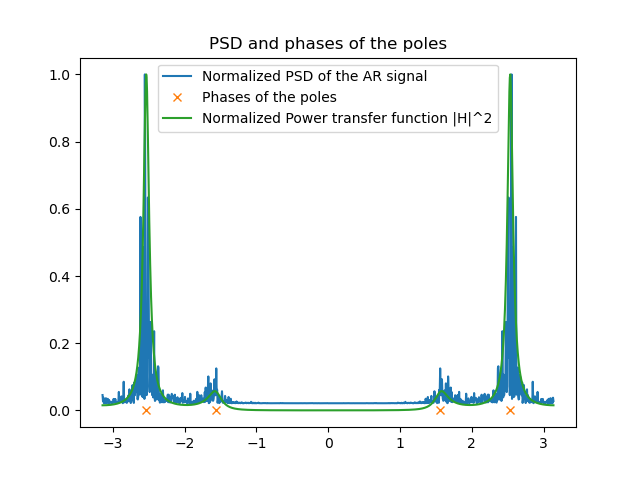

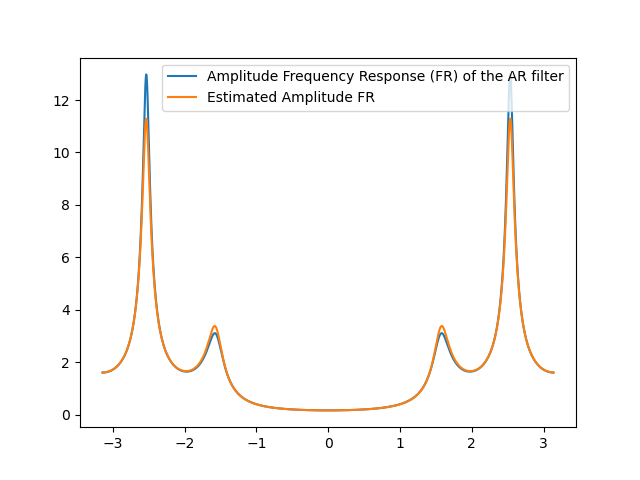

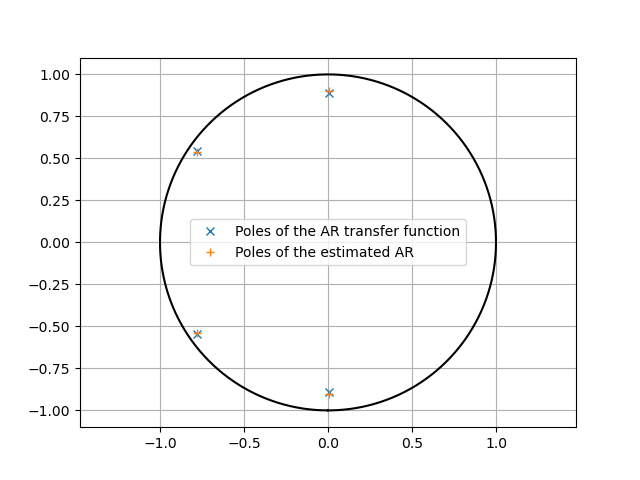

In [229]:
n = 1000
p = 4
std = 2

X, phi = genAR(p,n,std)
coeff= np.concatenate(([1], -phi))
drawZ_DTFT_AR(X,phi)
#%%

gamma =  acovb(X)
Gamma_hat = la.toeplitz( gamma[0:p+1])

# Define auxiliar vector
vector = np.zeros(p+1)
vector[0] = 1


# intermediate vector
v = np.matmul(la.inv(Gamma_hat), vector)


sigma2Est = 1/v[0]
estimated_coeff= sigma2Est* v
estimated_coeff[0] = 1              


print(estimated_coeff) 
print(coeff)            


err= coeff -     estimated_coeff
rel_err =  np.linalg.norm(err)/np.linalg.norm(coeff) 
print('Relative error {0:.2%} '.format(rel_err))


#% Show spectra
plt.figure()
nPoints = int(np.exp2( np.ceil(np.log2(X.size))))
nu = np.linspace(-0.5, 0.5 - 1/nPoints, nPoints)
omega = 2*np.pi*nu
w1, H1 = sig.freqz([1], coeff, omega)
w2, H2 = sig.freqz([1], estimated_coeff, omega)
plt.plot(w1,abs(H1))
plt.plot(w2,abs(H2))
plt.legend(['Amplitude Frequency Response (FR) of the AR filter','Estimated Amplitude FR' ])

#%%Display poles
plt.figure()
# Draw the unit circle

plt.axis('equal')
plt.grid()
zk    = np.roots(coeff)
plt.plot(np.real(zk),np.imag(zk), 'x' )
zk2 = np.roots(estimated_coeff)
plt.plot(np.real(zk2),np.imag(zk2), '+' )
plt.legend(['Poles of the AR transfer function','Poles of the estimated AR'])
t = np.linspace(-np.pi,np.pi,1000)
plt.plot(np.sin(t),np.cos(t), 'black')

# Part III - Application to speech signal

## 1.

Since $f=\frac{1}{T}$ and the fundamental frequency of the human voice is typically in the interval $[80\,\mathrm{Hz}, 400\,\mathrm{Hz}]$, then the period $T \in [\frac{1}{400}, \frac{1}{80}] [s] $.
In our case the sampling frequency is $F_S=8000Hz$, so we take $minT = \frac{8000}{400} = 20$ and $maxT= \frac{8000}{80} = 100$ samples .

## 2.

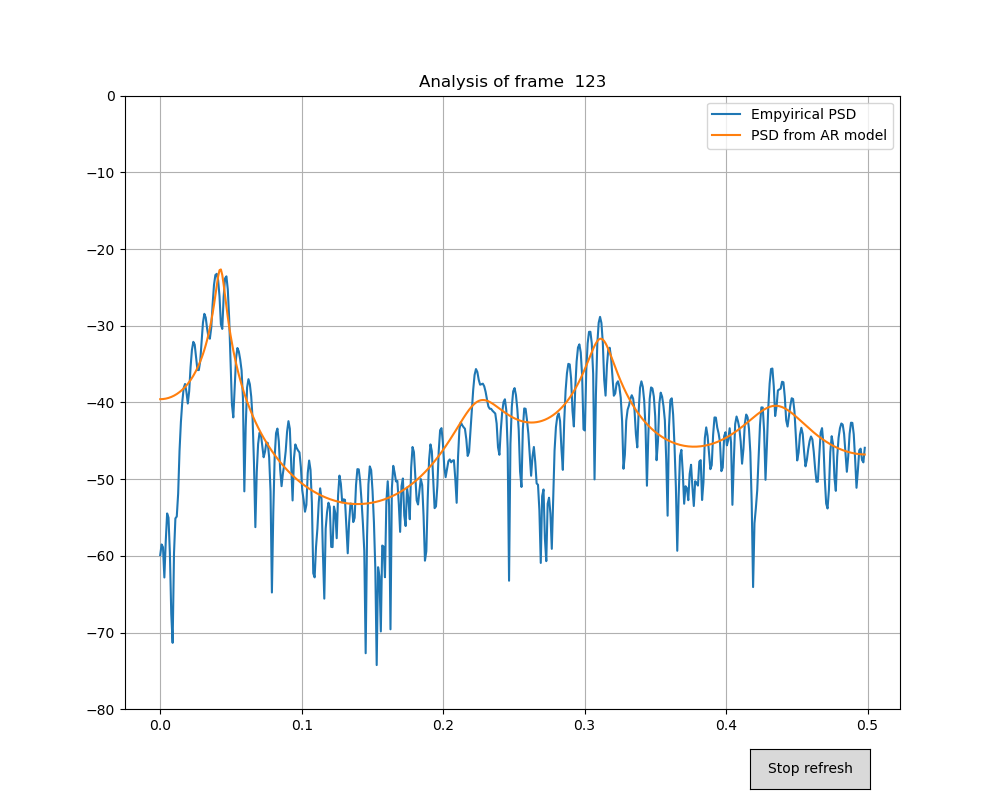

The PSD of the AR model is a smooth wave in comparison with the estimated empirical PSD, we could say that is a kind of an average.

## 3.

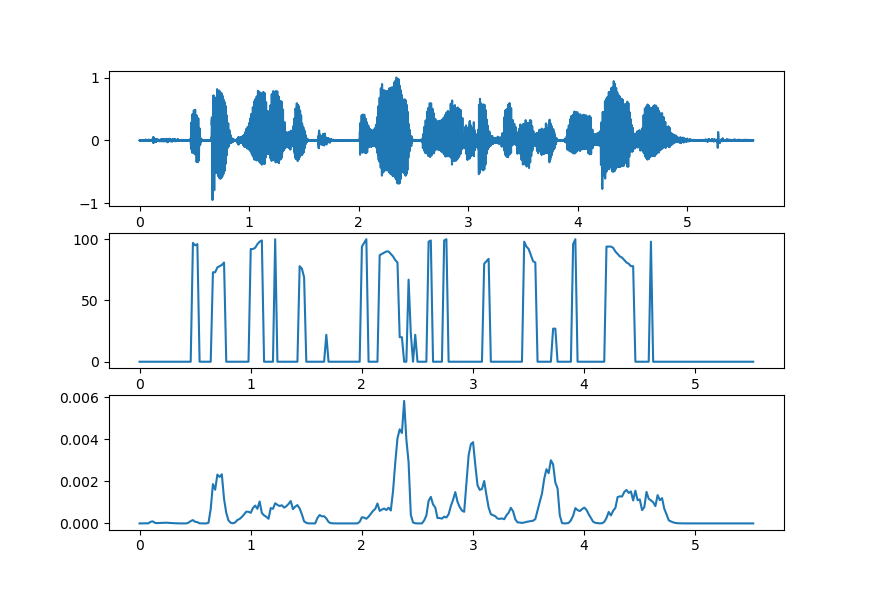

Above we have, in first place the waveform of the resynthesized signal, followed by the pitch of the resynthesized signal and finally the variance of the white noise.

## Code utilised for this part, implemented in the TP script.

    ### ANALYSIS
    ## CODE TO BE COMPLETED --->
    ## Pitch detection
    minFreq = 80 # Hz
    maxFreq = 400 # Hz
    minT    = int(framerate/maxFreq) # samples
    maxT    = int(framerate/minFreq) # samples
    pitch[frameIndex] = rp.detectPitch(frame, minT, maxT)

    ### AR estimation
    
    
    gamma =  rp.acovb(frame)
    Gamma_hat = la.toeplitz(gamma[0:p])
    v1 = np.zeros(p)
    v1[0] = 1
    v = la.inv(Gamma_hat)
    
    # estimating the variance
    sigma2Est = 1/v[0]
    
    # estimating the AR coefficients
    estimated_coeff = sigma2Est * v
    estimated_coeff[0] = 1
    
    coeff[:,frameIndex] = estimated_coeff # 1D array of size p
    sigma2[frameIndex]  = sigma2Est # scalar
    
    c1 = estimated_coeff
    
    ### CODE TO BE COMPLETED <---